In [1]:
# Manipulations standard
import geopandas as gpd
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# Pour la basemap
import contextily as cx
# Autres
import os
# Potentiel solaire package
from potentiel_solaire.constants import DATA_FOLDER

# Etape 1: Ouverture des datasets

## Dataset : départements

/tmp/ipykernel_23125/2162312035.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
/tmp/ipykernel_23125/2162312035.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


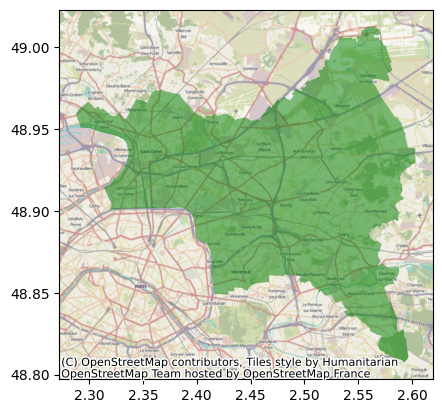

In [2]:
dpts = gpd.read_file(DATA_FOLDER / "contour-des-departements.geojson").to_crs(4326)
ShapeNT = dpts[dpts.code == "93"].geometry
fig, ax = plt.subplots()
dpts[dpts.code == "93"].plot(column="nom",legend=True, categorical = True, ax = ax, color="green",alpha=0.5)
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset : annuaire éducation / écoles

In [3]:
# Takes 58s on my laptop
annuaire = gpd.read_file(DATA_FOLDER / 'fr-en-annuaire-education.geojson')
print(len(annuaire),"items")
annuaire = annuaire[annuaire.code_postal.str.startswith("93")]
print(len(annuaire),"objets dans le 93")
annuaire = annuaire.to_crs(4326)
annuaire.head(3)

69645 items
1432 objets dans le 93


identifiant_de_l_etablissement  \
5268                       0930341R   
5301                       0930692X   
6121                       0931103U   

                                nom_etablissement type_etablissement  \
5268                Ecole élémentaire Jean Mermoz              Ecole   
5301                     Ecole élémentaire Danton              Ecole   
6121  Ecole primaire privée Saint Joseph La Salle              Ecole   

     statut_public_prive                  adresse_1 adresse_2  \
5268              Public  50 rue Philibert Hoffmann      None   
5301              Public     48 boulevard Gutenberg      None   
6121               Privé    12 avenue du 8 Mai 1945      None   

                  adresse_3 code_postal code_commune      nom_commune  ...  \
5268  93110 ROSNY SOUS BOIS       93110        93064  Rosny-sous-Bois  ...   
5301     93190 LIVRY GARGAN       93190        93046     Livry-Gargan  ...   
6121           93500 PANTIN       93500        93055           Pantin  ...   

     code_type_contrat_prive  pial etablissement_mere  \
5268                      99  None               None   
5301                      99  None               None   
6121                      30  None               None   

      type_rattachement_etablissement_mere  code_circonscription  \
5268                                  None              0931045F   
5301                                  None              0931050L   
6121                                  None              0931044E   

     code_zone_animation_pedagogique libelle_zone_animation_pedagogique  \
5268                            None                               None   
5301                            None                               None   
6121                            None                               None   

     code_bassin_formation libelle_bassin_formation                  geometry  
5268                  None                     None  POINT (2.48563 48.88039)  
5301                  None                     None  POINT (2.51684 48.91371)  
6121                  None                     None  POINT (2.41384 48.89148)  

[3 rows x 73 columns]

## Dataset : BD TOPO

In [4]:
import fiona

Vérifions quelles sont les layers de dispo dans le gpkg

In [5]:
GPKG = DATA_FOLDER / "BDTOPO_3-4_TOUSTHEMES_GPKG_LAMB93_D093_2024-12-15/BDTOPO/1_DONNEES_LIVRAISON_2024-12-00134/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15/BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg"
layers = fiona.listlayers(GPKG)
print(" ".join(layers))

troncon_de_route route_numerotee_ou_nommee itineraire_autre troncon_de_voie_ferree equipement_de_transport piste_d_aerodrome aerodrome point_de_repere non_communication point_du_reseau voie_ferree_nommee toponymie_transport batiment cimetiere construction_lineaire construction_ponctuelle construction_surfacique reservoir ligne_orographique pylone terrain_de_sport toponymie_bati cours_d_eau troncon_hydrographique bassin_versant_topographique plan_d_eau surface_hydrographique noeud_hydrographique detail_hydrographique toponymie_hydrographie zone_d_habitation lieu_dit_non_habite detail_orographique toponymie_lieux_nommes canalisation ligne_electrique poste_de_transformation erp zone_d_activite_ou_d_interet toponymie_services_et_activites voie_nommee parc_ou_reserve foret_publique toponymie_zones_reglementees haie zone_de_vegetation arrondissement arrondissement_municipal commune epci collectivite_territoriale departement region adresse_ban batiment_rnb_lien_bdtopo lien_adresse_vers_bdtopo

Et on les display

In [6]:
bats = gpd.read_file(GPKG, layer="batiment")# toponymie_services_et_activites
bats = bats.to_crs(4326) 

In [7]:
bats.columns

Index(['cleabs', 'nature', 'usage_1', 'usage_2', 'construction_legere',
       'etat_de_l_objet', 'date_creation', 'date_modification',
       'date_d_apparition', 'date_de_confirmation', 'sources',
       'identifiants_sources', 'methode_d_acquisition_planimetrique',
       'methode_d_acquisition_altimetrique', 'precision_planimetrique',
       'precision_altimetrique', 'nombre_de_logements', 'nombre_d_etages',
       'materiaux_des_murs', 'materiaux_de_la_toiture', 'hauteur',
       'altitude_minimale_sol', 'altitude_minimale_toit',
       'altitude_maximale_toit', 'altitude_maximale_sol',
       'origine_du_batiment', 'appariement_fichiers_fonciers',
       'identifiants_rnb', 'geometry'],
      dtype='object')

13348 items
1385 items dans la zone


/tmp/ipykernel_23125/2806925089.py:12: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
/tmp/ipykernel_23125/2806925089.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


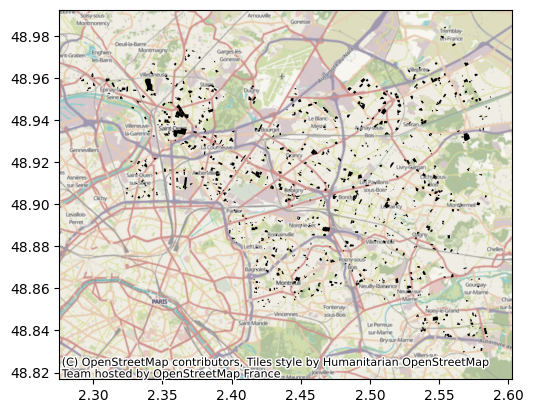

In [8]:
# Takes 10s on my laptop
bdedu = gpd.read_file(GPKG, layer="zone_d_activite_ou_d_interet")# toponymie_services_et_activites
print(len(bdedu),"items")
# Utilisons les memes projections
bdedu = bdedu.to_crs(4326) 
# Tri sur la catégorie d'intéret
bdedu = bdedu[bdedu["categorie"] == "Science et enseignement"] 
bdedu = gpd.sjoin(bdedu, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdedu),"items dans la zone")

fig, ax = plt.subplots()
bdedu.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()


In [9]:
bat_edu = gpd.sjoin(gpd.GeoDataFrame(bats[["cleabs","geometry","identifiants_rnb","materiaux_de_la_toiture","hauteur"]],geometry="geometry"), gpd.GeoDataFrame(bdedu[["cleabs","toponyme","geometry"]],geometry="geometry"), how='left').dropna(subset="toponyme")
bat_edu.head(3)

cleabs_left  \
1699  BATIMENT0000000002599800   
1771  BATIMENT0000000002600955   
1772  BATIMENT0000000002600963   

                                               geometry  \
1699  MULTIPOLYGON Z (((2.55395 48.98409 82.5, 2.553...   
1771  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.3772 ...   
1772  MULTIPOLYGON Z (((2.37721 48.96971 54, 2.37734...   

               identifiants_rnb materiaux_de_la_toiture  hauteur  index_right  \
1699  A12MR4AER8XA/H3V9FEZVTCQH                    None      7.9       8101.0   
1771               GMKNQX3Q3AY4                    None     11.4       9799.0   
1772               FWK5CQ31Y968                             11.3       9799.0   

                  cleabs_right                         toponyme  
1699  SURFACTI0000000002555409  I.M.E. B. Guillez le Petit Orme  
1771  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin  
1772  SURFACTI0000000002555414    Groupe Scolaire Paul Langevin

On peut aussi afficher les réseaux

/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(256)' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'character varying(30)' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/raw.py:198: RuntimeWarning: Field format 'timestamp with time zone' not supported
  return ogr_read(
/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'BDT_3-4_GPKG_LAMB93_D093-ED2024-12-15.gpkg': 'troncon_de_route' (default), 'r

188015 items
68497 items


/tmp/ipykernel_23125/1883887287.py:9: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
/tmp/ipykernel_23125/1883887287.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


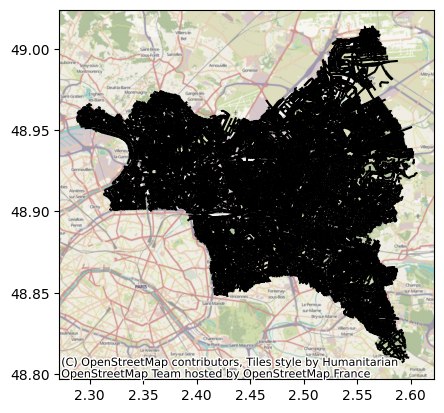

In [10]:
# Takes 80s on my laptop -- loading roads in this case
bdtopo = gpd.read_file(GPKG)
print(len(bdtopo),"items")
# Utilisons les memes projections
bdtopo = bdtopo.to_crs(4326)
bdtopo = gpd.sjoin(bdtopo, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(bdtopo),"items")
fig, ax = plt.subplots()
bdtopo.plot(column="nature",legend=True, categorical = True, ax = ax, color="black")
cx.add_basemap(ax, crs=dpts.crs)
fig.show()

## Dataset: parcellaire-express

In [11]:
# Takes 11s on my laptop
pci = gpd.read_file(DATA_FOLDER / "PARCELLAIRE-EXPRESS_1-1__SHP_LAMB93_D093_2024-10-01/PARCELLAIRE-EXPRESS/1_DONNEES_LIVRAISON_2024-11-00210/PEPCI_1-1_SHP_LAMB93_D093/BATIMENT.SHP")
print(len(pci),"items")
pci = pci.to_crs(4326)
pci = gpd.sjoin(pci, dpts[dpts.code == "93"], how='left').dropna(subset="code")
print(len(pci),"items - sorted")
pci.head(3)

376574 items
376220 items - sorted


TYPE                                           geometry  \
0  Construction légère  POLYGON ((2.39066 48.90535, 2.3907 48.90536, 2...   
1      Bâtiment en dur  POLYGON ((2.52665 48.87779, 2.52669 48.87777, ...   
2      Bâtiment en dur  POLYGON ((2.52583 48.87706, 2.52582 48.87706, ...   

   index_right code                nom  
0         93.0   93  Seine-Saint-Denis  
1         93.0   93  Seine-Saint-Denis  
2         93.0   93  Seine-Saint-Denis

# Etape 2: Exploration autour d'une école

## Etablissement d'une zone d'intérêt

In [12]:
pd.DataFrame(annuaire.iloc[0])

5268
identifiant_de_l_etablissement                                           0930341R
nom_etablissement                                   Ecole élémentaire Jean Mermoz
type_etablissement                                                          Ecole
statut_public_prive                                                        Public
adresse_1                                               50 rue Philibert Hoffmann
...                                                                           ...
code_zone_animation_pedagogique                                              None
libelle_zone_animation_pedagogique                                           None
code_bassin_formation                                                        None
libelle_bassin_formation                                                     None
geometry                            POINT (2.4856334782752603 48.880387220043886)

[73 rows x 1 columns]

In [13]:
# Filtrons autour de d = 100m
d = 0.02 # échelle à retrouver
zone = annuaire.iloc[0].geometry.buffer(d)

## Clip des dataset pour rester léger

In [14]:
bdtopo_d = bdtopo[bdtopo.geometry.within(zone)].clip(zone)# check with within
pci_d = pci[pci.geometry.within(zone)].clip(zone)# check with within
bdedu_d = bdedu[bdedu.geometry.within(zone)].clip(zone)# check with within
bat_edu_d =  bat_edu[bat_edu.geometry.within(zone)].clip(zone)

/tmp/ipykernel_23125/3993707997.py:6: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
/tmp/ipykernel_23125/3993707997.py:7: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")


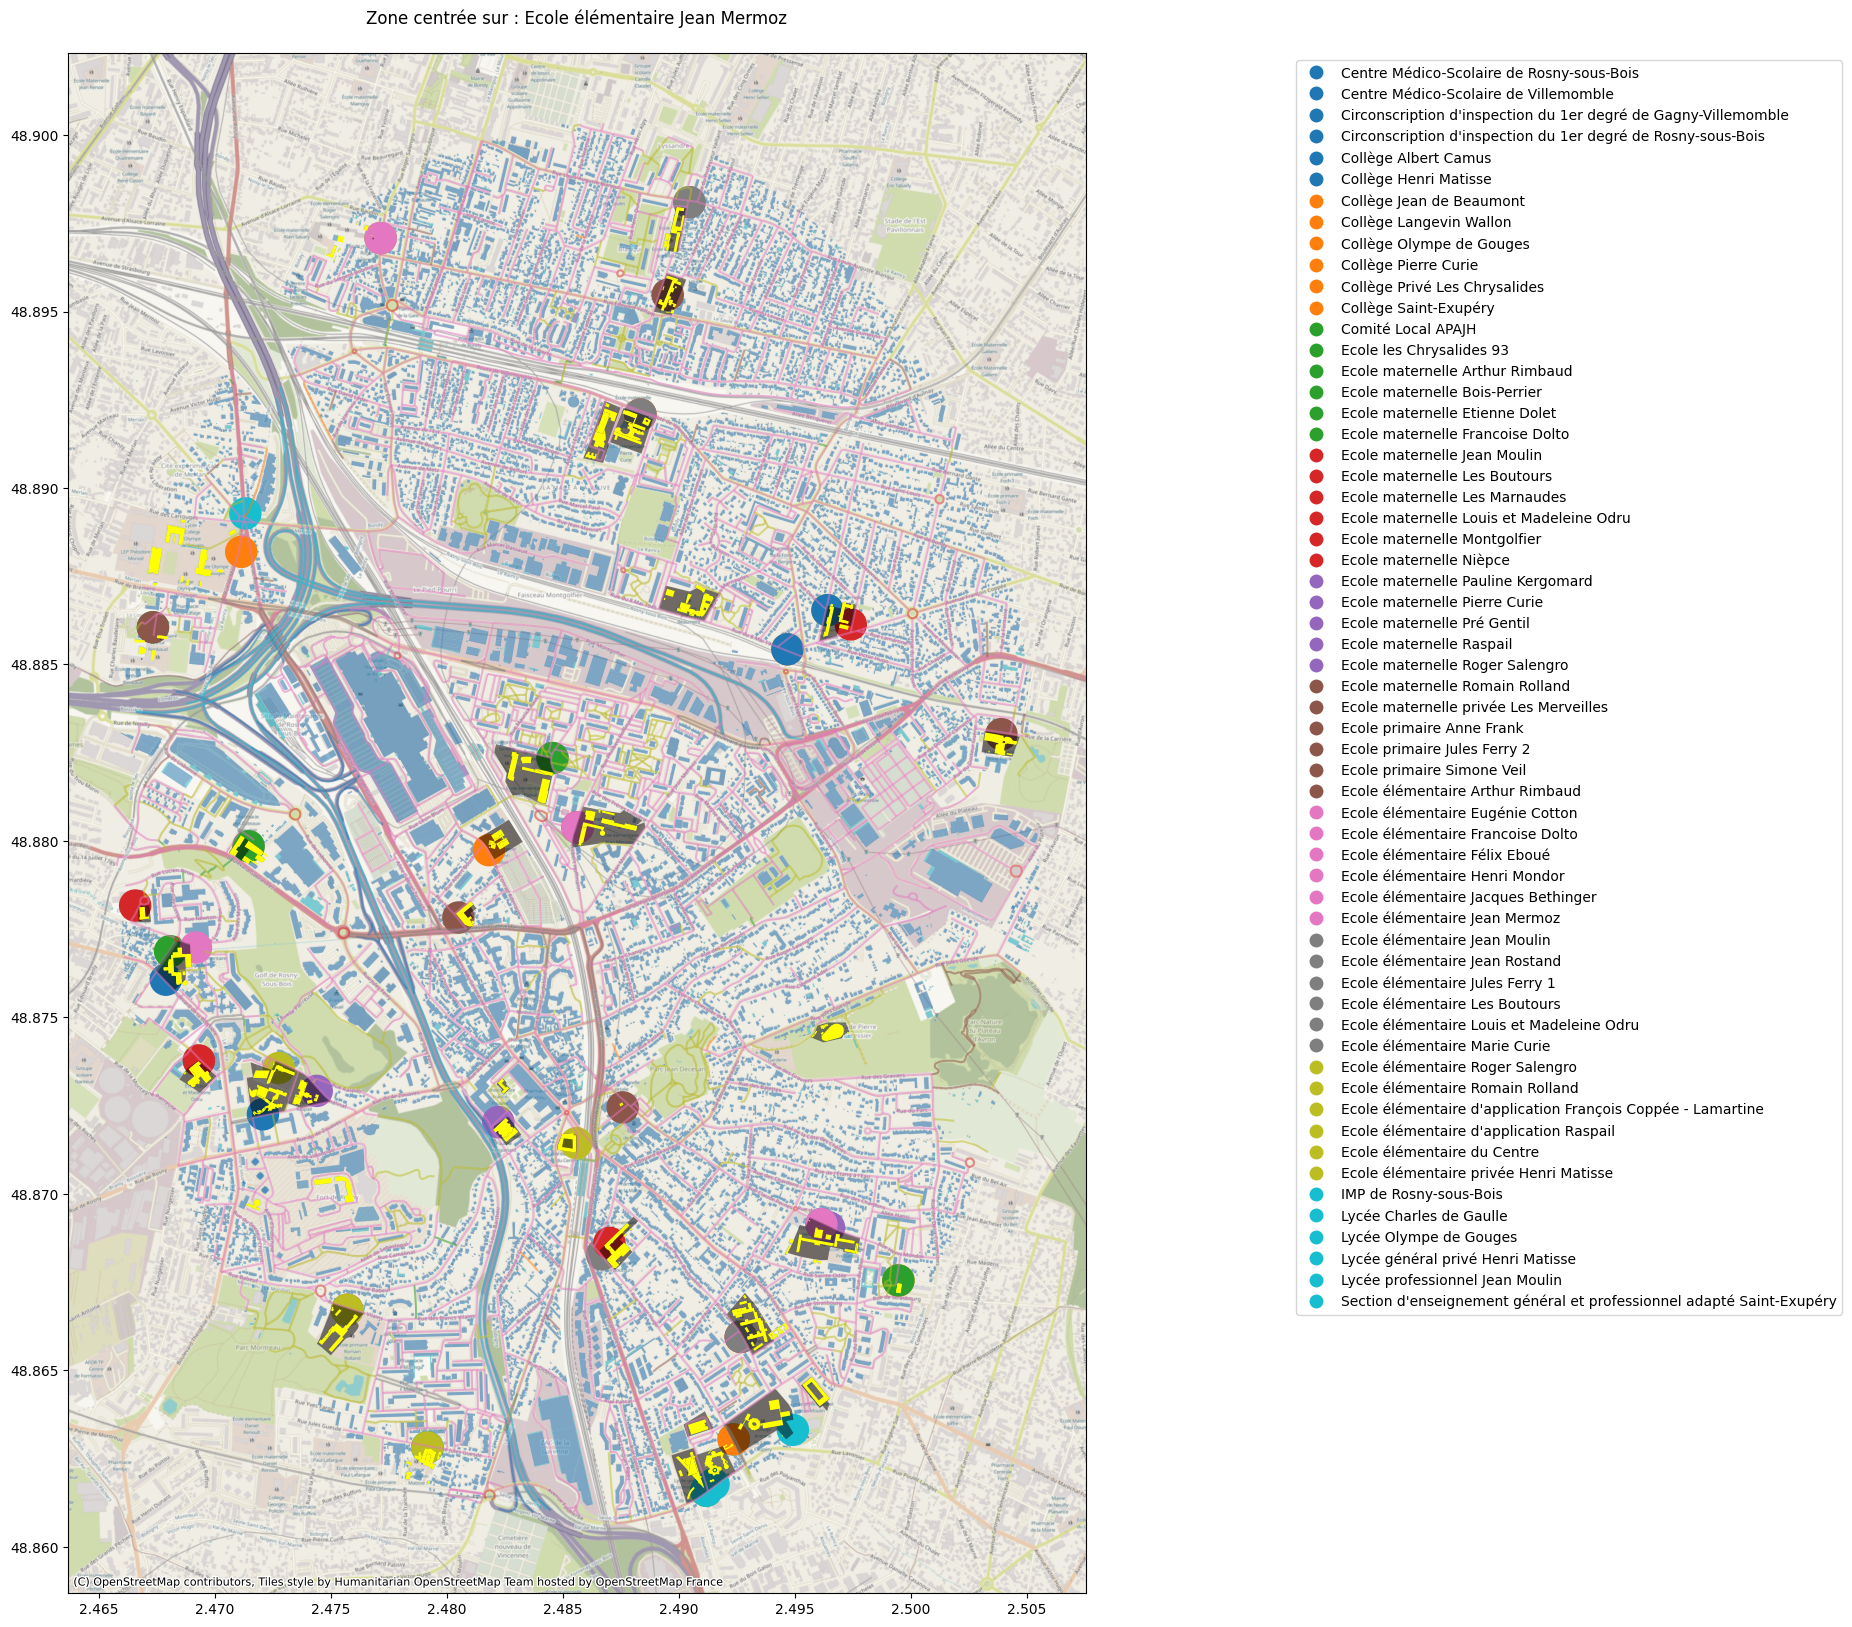

<Figure size 640x480 with 0 Axes>

In [15]:
#plots all dans la zone sélectionnée
fig, ax = plt.subplots(figsize=(20,20))
pci_d.plot(column="TYPE", legend=True, categorical = True, ax = ax, alpha=0.5)
bdtopo_d.plot(column="nature",legend=True, categorical = True, ax = ax, alpha=0.5)
annuaire[annuaire.geometry.within(zone)].clip(zone).plot(column = "nom_etablissement",legend=True, categorical = True, ax = ax, markersize=500, legend_kwds={'loc': 'upper left'})
bdedu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_d.plot(column="toponyme",legend=True, categorical = True, ax = ax, color="yellow")
cx.add_basemap(ax, crs=pci_d.crs, zoom=16) # source=cx.providers.OpenStreetMap.Mapnik,
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2, 0, 0, 1))
ax.set_title("Zone centrée sur : "+annuaire.iloc[0].nom_etablissement+"\n")
plt.show()
plt.savefig("preview_example.jpg")

# Etape 3: Travail au niveau d'une école spécifique

In [16]:
from shapely.ops import nearest_points

## Sélection de l'école et clip des datasets

In [17]:
# On s'intéresse à : bdedu_d, bat_edu_d
ecoles = annuaire[annuaire.geometry.within(zone)]
ecoles.head(3)

identifiant_de_l_etablissement               nom_etablissement  \
5268                       0930341R   Ecole élémentaire Jean Mermoz   
6233                       0932680H  Ecole élémentaire Les Boutours   
6234                       0932688S        Ecole les Chrysalides 93   

     type_etablissement statut_public_prive                  adresse_1  \
5268              Ecole              Public  50 rue Philibert Hoffmann   
6233              Ecole              Public       9-11 rue Victor Hugo   
6234              Ecole               Privé          6 rue de Mulhouse   

     adresse_2              adresse_3 code_postal code_commune  \
5268      None  93110 ROSNY SOUS BOIS       93110        93064   
6233      None  93110 ROSNY SOUS BOIS       93110        93064   
6234      None  93110 ROSNY SOUS BOIS       93110        93064   

          nom_commune  ... code_type_contrat_prive  pial etablissement_mere  \
5268  Rosny-sous-Bois  ...                      99  None               None   
6233  Rosny-sous-Bois  ...                      99  None               None   
6234  Rosny-sous-Bois  ...                      10  None               None   

      type_rattachement_etablissement_mere  code_circonscription  \
5268                                  None              0931045F   
6233                                  None              0931045F   
6234                                  None              0931045F   

     code_zone_animation_pedagogique libelle_zone_animation_pedagogique  \
5268                            None                               None   
6233                            None                               None   
6234                            None                               None   

     code_bassin_formation libelle_bassin_formation                  geometry  
5268                  None                     None  POINT (2.48563 48.88039)  
6233                  None                     None  POINT (2.48669 48.86828)  
6234                  None                     None  POINT (2.49946 48.86754)  

[3 rows x 73 columns]

In [18]:
recollement = gpd.sjoin_nearest(ecoles, bdedu_d, distance_col="distances", lsuffix="e_", rsuffix="f_", exclusive=True)[["identifiant_de_l_etablissement","nom_etablissement","distances","toponyme","cleabs","nature","nature_detaillee"]]
recollement.head(3)

/home/kelu/projets/13_potentiel_solaire/algorithme/.venv/lib/python3.10/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


identifiant_de_l_etablissement               nom_etablissement  \
5268                       0930341R   Ecole élémentaire Jean Mermoz   
6233                       0932680H  Ecole élémentaire Les Boutours   
6234                       0932688S        Ecole les Chrysalides 93   

      distances                                       toponyme  \
5268   0.000000                 École Maternelle les Marnaudes   
6233   0.000012  Écoles Maternelle et Élémentaire les Boutours   
6234   0.000131                  Collège Privé les Chrysalides   

                        cleabs                 nature nature_detaillee  
5268  SURFACTI0000000002555986  Enseignement primaire  Groupe scolaire  
6233  SURFACTI0000000351259115  Enseignement primaire   Ecole primaire  
6234  SURFACTI0000002322903219                Collège             None

Et on essaye de bien vérifier que les écoles identifiées soient celles des zones identifiées, pour ca on vérifie la distance entre les écoles et les zones

Et on retire les matchs où la distance entre les deux points est trop grande

0.00010756679533563563


<Axes: >

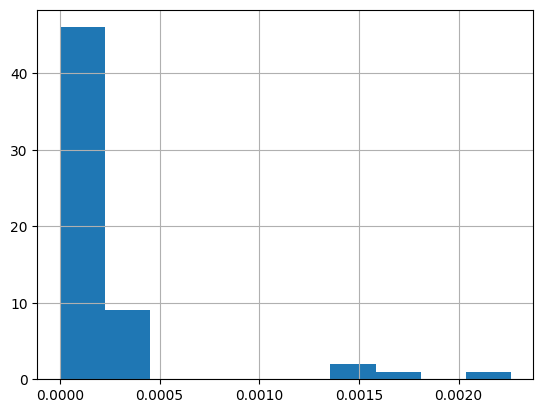

In [19]:
seuil_recol = recollement.distances.quantile(q=0.7)
print(seuil_recol)
recollement.distances.hist()

In [20]:
recollement = recollement[recollement.distances < seuil_recol]
bdedu_areas = recollement.toponyme.unique()
bdedu_r = bdedu[bdedu.toponyme.isin(bdedu_areas)]
recollement.head(3)

identifiant_de_l_etablissement                        nom_etablissement  \
5268                        0930341R            Ecole élémentaire Jean Mermoz   
6233                        0932680H           Ecole élémentaire Les Boutours   
13735                       0930396A  Ecole élémentaire d'application Raspail   

       distances                                       toponyme  \
5268    0.000000                 École Maternelle les Marnaudes   
6233    0.000012  Écoles Maternelle et Élémentaire les Boutours   
13735   0.000000                      École Élémentaire Raspail   

                         cleabs                 nature   nature_detaillee  
5268   SURFACTI0000000002555986  Enseignement primaire    Groupe scolaire  
6233   SURFACTI0000000351259115  Enseignement primaire     Ecole primaire  
13735  SURFACTI0000000002556026  Enseignement primaire  Ecole élémentaire

## Création d'une liste école par école au sein de la zone définie à l'étape 2

/tmp/ipykernel_23125/564879362.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)


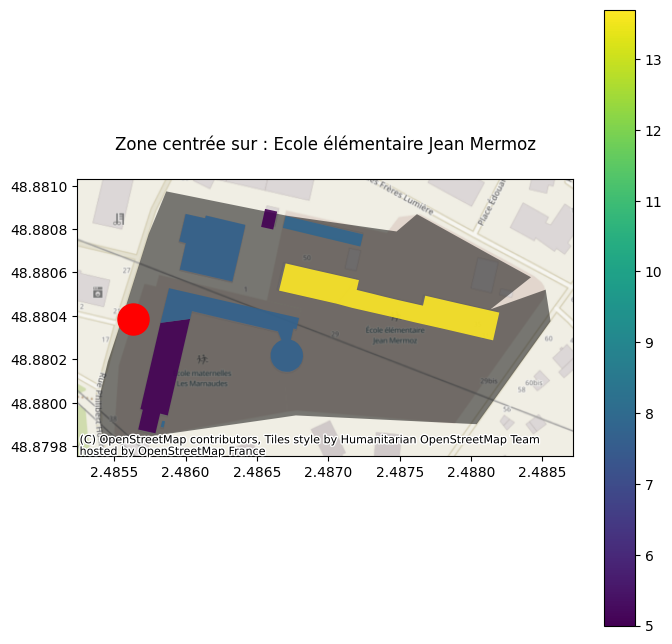

In [27]:
documentation = "# Example de liste d'écoles\n\n"

fullRun = False # Set true to to all all schools
if fullRun :
    ecoles_to_run = recollement["identifiant_de_l_etablissement"].unique()
else:
    ecoles_to_run = [recollement["identifiant_de_l_etablissement"].unique()[0]]
for id_ecole in ecoles_to_run:

    ecole = ecoles[ecoles.identifiant_de_l_etablissement == id_ecole]
    documentation +="## "+ecole.iloc[0]["nom_etablissement"]+"\n\n" + \
        "* Type etablissement: "+ecole.iloc[0]["type_etablissement"] +"\n"+ \
        "* adresse_1: "+ecole.iloc[0]["adresse_1"] +"\n"+ \
        "* nom_commune: "+ecole.iloc[0]["nom_commune"] +"\n"+ \
        "* identifiant_de_l_etablissement: "+ecole.iloc[0]["identifiant_de_l_etablissement"] +"\n"
    match = recollement[recollement.identifiant_de_l_etablissement == id_ecole]
    zone = ecole.iloc[0].geometry.buffer(0.01)
    bdedu_s = bdedu[bdedu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s = bat_edu[bat_edu.toponyme == match.iloc[0].toponyme ].clip(zone)
    bat_edu_s['hauteur'].fillna((bat_edu_s['hauteur'].mean()+0.001), inplace=True)
    geod = bat_edu_s.crs.get_geod()
    bat_edu_s["area_m2"] = bat_edu_s.geometry.apply(lambda g: abs(geod.geometry_area_perimeter(g)[0]))
    documentation += "* Surface totale: "+str(int(bat_edu_s.area_m2.sum())) +"m2\n\n"
    if os.path.isfile("images/"+id_ecole+".jpg"):
        pass
    else:
        fig, ax = plt.subplots(figsize=(8,8))
        bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
        bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
        ecole.plot(color="red", ax = ax, markersize=500)
        cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
        ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
        plt.savefig("images/"+id_ecole+".jpg")

    documentation += "### Image\n\n![]("+ecole.iloc[0]["identifiant_de_l_etablissement"]+".jpg)\n\n"
if not fullRun:
    fig, ax = plt.subplots(figsize=(8,8))
    bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
    bat_edu_s.plot(column="hauteur",legend=True, ax = ax, alpha=0.9)
    ecole.plot(color="red", ax = ax, markersize=500)
    cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
    ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\n")
else:
    with open("images/Readme.md", "w") as f:
        f.write(documentation)

# Etape 3: Intégration pour le d93 une source de donnée 'potentiel solaire"

* Provenance: https://data-iau-idf.opendata.arcgis.com/datasets/iau-idf::le-potentiel-solaire-des-toitures/

##  Préparation de la requete


On définit le périmètre de la zone d'intérêt avant d'aller demander les data

In [47]:
dfecole = pd.concat([bdedu_s,bat_edu_s,ecole])
gdf = gpd.GeoDataFrame(dfecole,geometry="geometry")
geo = ",".join([str(x) for x in gdf.total_bounds])
geo


'2.4853980733826986,48.87981160695636,2.4885570162361557,48.88097363204391'

On prend les données des batiments qui sont dans la box

In [46]:
import requests

requete_type = "https://geoweb.iau-idf.fr/agsmap1/rest/services/OPENDATA/OpendataIAU4/MapServer/26/query?where=1%3D1&outFields=*&geometry="+geo+"&geometryType=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json"

response = requests.get(requete_type) 


In [67]:
potentiel_batiment = pd.DataFrame([x["attributes"] for x in response.json()["features"]])
potentiel_batiment = potentiel_batiment[potentiel_batiment.id.isin(bat_edu_s.cleabs_left)]
bat_edu_p = bat_edu_s.merge(potentiel_batiment,how="left", left_on="cleabs_left", right_on="id")
bat_edu_p.head(3)

cleabs_left  \
0  BATIMENT0000000313027262   
1  BATIMENT0000000313027260   
2  BATIMENT0000000313027263   

                                            geometry identifiants_rnb  \
0  POLYGON Z ((2.48585 48.87989 -1000, 2.48583 48...             None   
1  POLYGON Z ((2.48587 48.88037 71.1, 2.48603 48....     Y8GPADQZH2DC   
2  POLYGON Z ((2.48604 48.88042 73.7, 2.48603 48....     T2BATBV2GF9E   

  materiaux_de_la_toiture  hauteur  index_right              cleabs_right  \
0                    None    7.821      10264.0  SURFACTI0000000002555986   
1                    None    5.000      10264.0  SURFACTI0000000002555986   
2                    None    7.700      10264.0  SURFACTI0000000002555986   

                         toponyme     area_m2  objectid  ...  \
0  École Maternelle les Marnaudes    4.690845  487299.0  ...   
1  École Maternelle les Marnaudes  785.396726  462578.0  ...   
2  École Maternelle les Marnaudes  943.029946  410712.0  ...   

                       systeme protection  mos2017    insee     moyenne2  \
0                Non favorable        0.0     58.0  93064.0          NaN   
1  thermique ou photovoltaïque        0.0     58.0  93064.0  1163.837235   
2  thermique ou photovoltaïque        0.0     58.0  93064.0  1196.987103   

  forme    production mos17  st_area(shape)  st_length(shape)  
0  plat      0.000000  10.0           4.690          9.387851  
1  plat  61084.136939  10.0         785.255        146.565731  
2  plat  30675.786982  10.0         509.500        144.429145  

[3 rows x 27 columns]

## Visualisation

Text(0.5, 1.0, "Zone centrée sur : Ecole élémentaire Jean Mermoz\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

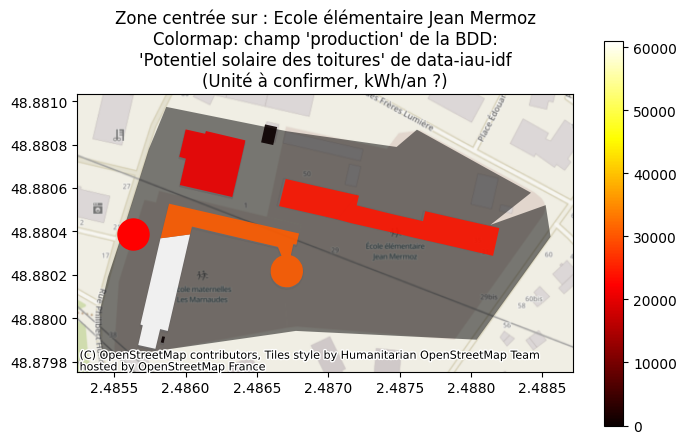

In [75]:
fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
bat_edu_p.plot(column="production",legend=True, ax = ax, alpha=0.9,cmap="hot")
ecole.plot(color="red", ax = ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
ax.set_title("Zone centrée sur : "+ecole.iloc[0].nom_etablissement+"\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
bdedu_s.plot(legend=True, categorical = True, ax = ax, color="black", alpha=0.5)
potentiel_batiment.plot(column="production",legend=True, ax = ax, alpha=0.9,cmap="hot")
ecole.plot(color="red", ax = ax, markersize=500)
cx.add_basemap(ax, crs=pci_d.crs, zoom=18) # source=cx.providers.OpenStreetMap.Mapnik,
ax.set_title("Tous batiments autour de : "+ecole.iloc[0].nom_etablissement+"\nColormap: champ 'production' de la BDD:\n'Potentiel solaire des toitures' de data-iau-idf\n(Unité à confirmer, kWh/an ?)")